<a href="https://colab.research.google.com/github/danjethh/steg_analysis/blob/main/revised_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 66.3 MB/s eta 0:00:00


In [41]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image
from scipy.ndimage import sobel
from scipy.stats import skew, kurtosis
import pywt
from scipy import ndimage
from scipy.stats import pearsonr
import pandas as pd

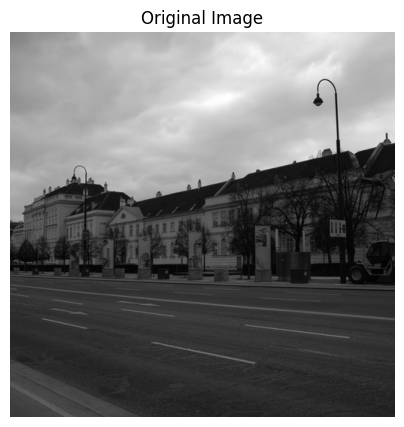

Image Metadata:
Format: PPM
Size: (512, 512)
Mode: L


In [18]:
# Step 1: Show the Picture with Its Image Description and Metadata
# Load an image from a URL
image_url = "https://raw.githubusercontent.com/Sourish1997/steganalysis/master/bossbase_sample/14.pgm"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Display image metadata
print("Image Metadata:")
print(f"Format: {img.format}")
print(f"Size: {img.size}")
print(f"Mode: {img.mode}")

Pixel Number Array:
[[128 128 126 ... 190 190 189]
 [128 128 128 ... 190 190 190]
 [128 129 129 ... 191 190 190]
 ...
 [ 57  57  59 ...  46  40  33]
 [ 59  57  58 ...  42  42  34]
 [ 60  55  57 ...  36  36  38]]


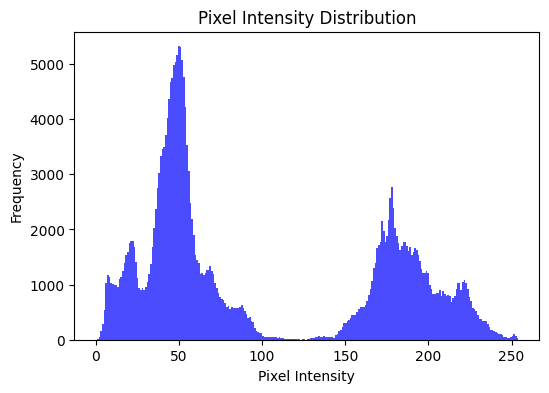

In [19]:
# Step 2: Show the Pixel Number Array and Pixel Intensity Distribution
# Convert image to grayscale array
img_array = np.array(img)

# Display the pixel array
print("Pixel Number Array:")
print(img_array)

# Plotting pixel intensity histogram
plt.figure(figsize=(6, 4))
plt.hist(img_array.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()




In [20]:
# Step 3: Show the Bit Distribution of the Image
# Display the bit representation of pixel values
bit_representation = np.vectorize(np.binary_repr)(img_array, width=8)
print("Bit Representation of Pixel Array:")
print(bit_representation)


# Visualizing the bit distribution
#fig, ax = plt.subplots(figsize=(8, 6))
#ax.imshow(np.array([[int(bit, 2) for bit in row] for row in bit_representation]), cmap='gray')
#plt.title('Bit Distribution Visualization')
#plt.axis('off')
#plt.show()

Bit Representation of Pixel Array:
[['10000000' '10000000' '01111110' ... '10111110' '10111110' '10111101']
 ['10000000' '10000000' '10000000' ... '10111110' '10111110' '10111110']
 ['10000000' '10000001' '10000001' ... '10111111' '10111110' '10111110']
 ...
 ['00111001' '00111001' '00111011' ... '00101110' '00101000' '00100001']
 ['00111011' '00111001' '00111010' ... '00101010' '00101010' '00100010']
 ['00111100' '00110111' '00111001' ... '00100100' '00100100' '00100110']]


In [24]:
# Step 2: Hide a Secret Message using LSB Replacement
message = "Secret"  # Define the hidden message
print(f"Hidden Message: {message}")

# Convert message to binary character by character
message_bits = ''.join([format(ord(char), '08b') for char in message])
print("Message in Binary Representation:")
for char in message:
    print(f"{char}: {format(ord(char), '08b')}")

print(f"Putting it together: {message_bits}")

# Function to Embed Message into Image using LSB Replacement
def embed_message(image_array, message_bits):
    """
    Embeds a binary message into the LSBs of an image using LSB replacement.

    Parameters:
    - image_array: NumPy array representation of the image.
    - message_bits: The binary representation of the secret message.

    Returns:
    - Modified NumPy array with the hidden message embedded.
    """
    flat_image = image_array.flatten().astype(np.uint8)  # Convert explicitly to uint8

    # Store the original bits of the image pixels that will be modified
    original_bits = [np.binary_repr(flat_image[i], width=8) for i in range(len(message_bits))]

    # Modify the least significant bit (LSB) of each pixel with message bits
    for i in range(len(message_bits)):
        # Ensure safe operation within uint8 limits
        pixel_value = flat_image[i]  # Get original pixel value
        modified_pixel = (pixel_value & 0b11111110) | int(message_bits[i])  # Apply LSB replacement safely
        flat_image[i] = np.clip(modified_pixel, 0, 255)  # Ensure values stay in range

    # Store the modified bits after embedding the message
    modified_bits = [np.binary_repr(flat_image[i], width=8) for i in range(len(message_bits))]

    # Print a comparison of the original and modified pixel values
    print("\nLSB Replacement Analysis:")
    for i in range(len(message_bits)):
        print(f"Original Byte: {original_bits[i]} -> Modified Byte: {modified_bits[i]}")

    # Reshape the modified image back to its original dimensions
    return flat_image.reshape(image_array.shape)


Hidden Message: Secret
Message in Binary Representation:
S: 01010011
e: 01100101
c: 01100011
r: 01110010
e: 01100101
t: 01110100
Putting it together: 010100110110010101100011011100100110010101110100



LSB Replacement Analysis:
Original Byte: 10000000 -> Modified Byte: 10000000
Original Byte: 10000000 -> Modified Byte: 10000001
Original Byte: 01111110 -> Modified Byte: 01111110
Original Byte: 10000000 -> Modified Byte: 10000001
Original Byte: 10000001 -> Modified Byte: 10000000
Original Byte: 10000001 -> Modified Byte: 10000000
Original Byte: 10000001 -> Modified Byte: 10000001
Original Byte: 10000010 -> Modified Byte: 10000011
Original Byte: 10000010 -> Modified Byte: 10000010
Original Byte: 10000010 -> Modified Byte: 10000011
Original Byte: 10000010 -> Modified Byte: 10000011
Original Byte: 10000011 -> Modified Byte: 10000010
Original Byte: 10000100 -> Modified Byte: 10000100
Original Byte: 10000100 -> Modified Byte: 10000101
Original Byte: 10000100 -> Modified Byte: 10000100
Original Byte: 10000101 -> Modified Byte: 10000101
Original Byte: 10000101 -> Modified Byte: 10000100
Original Byte: 10000101 -> Modified Byte: 10000101
Original Byte: 10000110 -> Modified Byte: 10000111
Orig

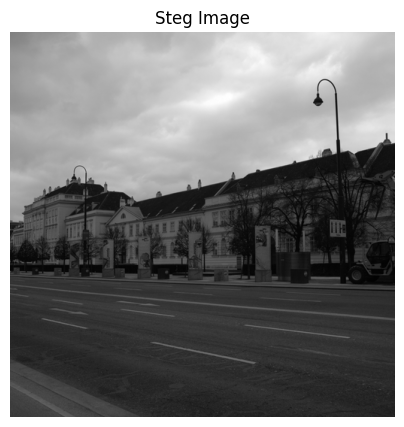

Bit Representation of Steg Image Pixel Array:
[['10000000' '10000001' '01111110' ... '10111110' '10111110' '10111101']
 ['10000000' '10000000' '10000000' ... '10111110' '10111110' '10111110']
 ['10000000' '10000001' '10000001' ... '10111111' '10111110' '10111110']
 ...
 ['00111001' '00111001' '00111011' ... '00101110' '00101000' '00100001']
 ['00111011' '00111001' '00111010' ... '00101010' '00101010' '00100010']
 ['00111100' '00110111' '00111001' ... '00100100' '00100100' '00100110']]


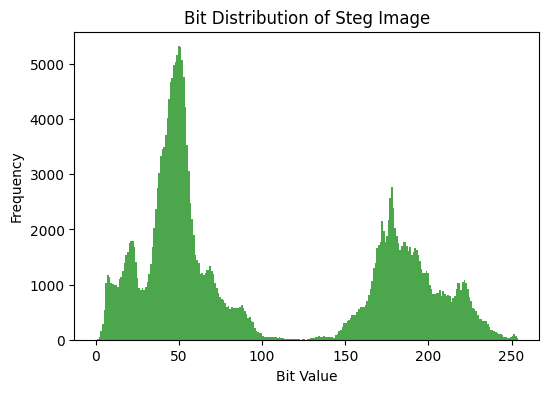

In [25]:
# Create Stego Image with the hidden message
steg_image_array = embed_message(img_array, message_bits)

# Display the stego image
plt.figure(figsize=(5, 5))
plt.imshow(steg_image_array, cmap='gray')
plt.title('Steg Image')
plt.axis('off')
plt.show()

# Show the bit representation of the stego image
steg_bit_representation = np.vectorize(np.binary_repr)(steg_image_array, width=8)
print("Bit Representation of Steg Image Pixel Array:")
print(steg_bit_representation)

# Show the histogram of the stego image to visualize any pixel intensity changes
plt.figure(figsize=(6, 4))
plt.hist(steg_image_array.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Bit Distribution of Steg Image')
plt.xlabel('Bit Value')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Step 3: Extract the Hidden Message from the Stego Image
# This function reverses the embedding process to retrieve the hidden bits
def extract_message(image_array, length):
    # Flatten the image to access pixel values sequentially
    flat_image = image_array.flatten()

    # Extract the LSBs from the first 'length' pixels (where the message was hidden)
    extracted_bits = ''.join([str(flat_image[i] & 1) for i in range(length)])

    # Convert extracted bits back to characters
    extracted_chars = [chr(int(extracted_bits[i:i+8], 2)) for i in range(0, length, 8)]

    # Reconstruct the original hidden message
    extracted_message = ''.join(extracted_chars)
    return extracted_message

# Extract and display the hidden message from the stego image
retrieved_message = extract_message(steg_image_array, len(message_bits))
print("\nExtracted Hidden Message:")
print(retrieved_message)

# Explanation of Message Extraction:
# 1. The recipient receives the stego image.
# 2. The extraction process checks the least significant bit (LSB) of each pixel.
# 3. The extracted bits are grouped into 8-bit segments.
# 4. Each 8-bit segment is converted back into characters using ASCII.
# 5. The retrieved characters form the original hidden message.

# This process is used in steganography tools that extract secret messages from images by analyzing the LSBs of pixels.



Extracted Hidden Message:
Secret


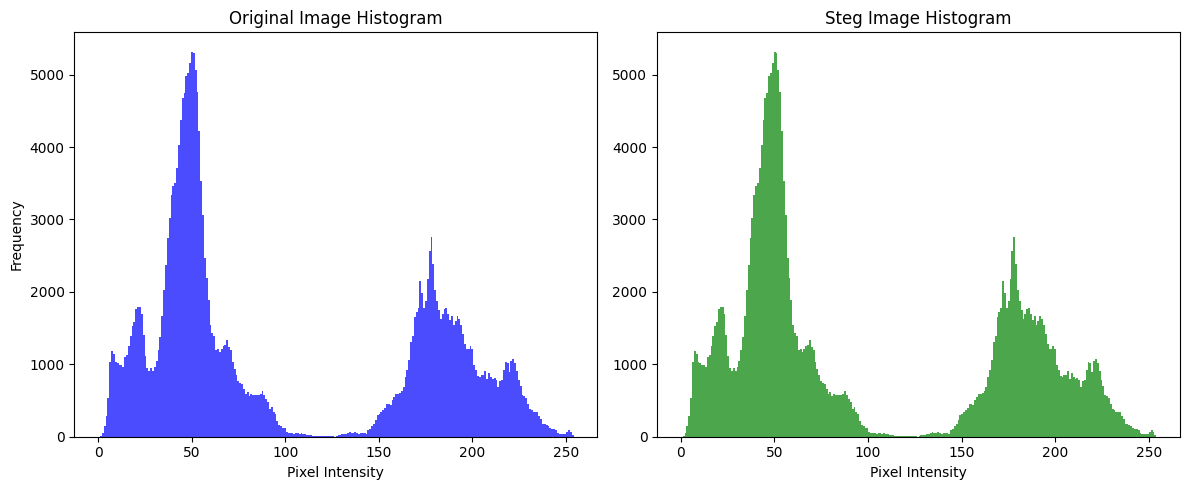

In [27]:
# Step 6: Show Histogram Distribution of Both Images Side by Side
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(img_array.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Original Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(steg_image_array.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Steg Image Histogram')
plt.xlabel('Pixel Intensity')

plt.tight_layout()
plt.show()

In [42]:
# Step 4: Feature Extraction
print("\nWhat Are Features?\n")
print("Features are measurable properties of an image that help identify patterns and train machine learning models. They can include pixel intensity, texture, edges, and statistical properties.")

print("\nFeature Extraction Methods:")
# Simple Feature Extraction (Basic Statistical Features)
def simple_feature_extraction(image_array):
    """Extracts basic features such as mean, standard deviation, and edge intensity."""
    print("Extracting Simple Features...")
    features = []

    # Compute Mean and Standard Deviation - Represents overall brightness and contrast of the image
    mean_value = np.mean(image_array)  # Compute the average intensity of pixels
    std_dev = np.std(image_array)  # Measure the spread of pixel values around the mean
    features.extend([mean_value, std_dev])
    print(f"Mean Pixel Intensity: {mean_value}, Standard Deviation: {std_dev}")

    from scipy.ndimage import sobel
    # Compute Edge Detection Features - Using Sobel filter to detect edges
    edges = sobel(image_array)  # Apply Sobel filter to highlight edges
    edge_mean = np.mean(edges)  # Compute the average intensity of detected edges
    edge_std = np.std(edges)  # Measure variation in edge intensity
    features.extend([edge_mean, edge_std])
    print(f"Edge Mean Intensity: {edge_mean}, Edge Standard Deviation: {edge_std}")

    return features

print("Explanation of Simple Features:")
print("1. Mean Pixel Intensity - Measures the overall brightness level of the image.")
print("2. Standard Deviation - Determines the contrast level by analyzing variation in pixel intensity.")
print("3. Edge Mean Intensity - Captures the presence of edges in an image, indicating object boundaries.")
print("4. Edge Standard Deviation - Shows variation in edge intensity, helping to distinguish textures.")

# Extract and show features for both images
original_features = [float(f) for f in simple_feature_extraction(img_array)]
stego_features = [float(f) for f in simple_feature_extraction(steg_image_array)]

print("\nExtracted Features for Original Image:")
print(original_features)

print("\nExtracted Features for Stego Image:")
print(stego_features)

# Create a structured table for feature values
df_features = pd.DataFrame({
    "Feature": ["Mean Pixel Intensity", "Standard Deviation", "Edge Mean Intensity", "Edge Standard Deviation"],
    "Original Image": original_features,
    "Stego Image": stego_features
})

print("\nExtracted Features:")
print(df_features.to_string(index=False))



What Are Features?

Features are measurable properties of an image that help identify patterns and train machine learning models. They can include pixel intensity, texture, edges, and statistical properties.

Feature Extraction Methods:
Explanation of Simple Features:
1. Mean Pixel Intensity - Measures the overall brightness level of the image.
2. Standard Deviation - Determines the contrast level by analyzing variation in pixel intensity.
3. Edge Mean Intensity - Captures the presence of edges in an image, indicating object boundaries.
4. Edge Standard Deviation - Shows variation in edge intensity, helping to distinguish textures.
Extracting Simple Features...
Mean Pixel Intensity: 100.40674591064453, Standard Deviation: 72.43777595607094
Edge Mean Intensity: 115.4901123046875, Edge Standard Deviation: 116.31545071181037
Extracting Simple Features...
Mean Pixel Intensity: 100.40675354003906, Standard Deviation: 72.43777996818234
Edge Mean Intensity: 115.4940185546875, Edge Standard D

In [43]:
# Advanced Feature Extraction using Bit Plane Analysis
def getBitPlanes(img):
    bin_image = []
    bit_planes = []

    # Convert each pixel into binary representation (8-bit values)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            bin_image.append(np.binary_repr(img[i][j], width=8))

    # Extract each bit-plane separately (from MSB to LSB)
    for i in range(8):
        bit_planes.append(np.array([int(b[i]) for b in bin_image]).reshape(img.shape))

    return bit_planes

# Function to compute correlation between bit planes
def autocor(A, k, l):
    """Computes correlation between pixel intensities at displacement (k, l)."""
    Xk = A[0:A.shape[0] - k, 0:A.shape[1] - l]
    Xl = A[k:A.shape[0], l:A.shape[1]]
    return pearsonr(Xk.flatten(), Xl.flatten())

# Feature extraction from bit planes
def advanced_feature_extraction(image_array):
    """Extracts bit plane correlation features for steganalysis."""
    #print("Extracting Advanced Bit Plane Features...")
    features = []
    bit_planes = getBitPlanes(image_array)

    # Compute Correlation Features from bit planes
    M1 = bit_planes[0]  # Least significant bit plane (LSBP)
    M2 = bit_planes[1]  # Second least significant bit plane (LSBP2)

    features.append(pearsonr(M1.flatten(), M2.flatten())[0])  # Compute correlation between LSBP and LSBP2

    autocor_kl_pairs = [[1, 0], [2, 0], [3, 0], [4, 0], [0, 1], [0, 2], [0, 3], [0, 4]]
    for pair in autocor_kl_pairs:
        features.append(autocor(M1, pair[0], pair[1])[0])  # Compute auto-correlation at various displacements

    return features


# Extract Features for Original and Stego Images
print("\nExtracting Features for Original Image")
simple_features_original = [float(f) for f in simple_feature_extraction(img_array)]
advanced_features_original = [float(f) for f in advanced_feature_extraction(img_array)]

print("\nExtracting Features for Stego Image")
simple_features_stego = [float(f) for f in simple_feature_extraction(steg_image_array)]  # Placeholder, replace with actual stego image
advanced_features_stego = [float(f) for f in advanced_feature_extraction(steg_image_array)]  # Placeholder, replace with actual stego image

# Print Extracted Features
print("\nExtracted Simple Features for Original Image:")
print(simple_features_original)

print("\nExtracted Simple Features for Stego Image:")
print(simple_features_stego)

print("-------------------------------------------------------------------------------")

print("\nExtracted Advanced Bit Plane Features for Original Image:")
print(advanced_features_original)

print("\nExtracted Advanced Bit Plane Features for Stego Image:")
print(advanced_features_stego)

print("-------------------------------------------------------------------------------")

print("Advanced Feature Columns Explanation:")
print("Total Columns: 9")
print("1. Correlation between LSBP and LSBP2 - Measures similarity between the least significant bit planes.")
print("   - A high value indicates a strong relationship between adjacent bit planes, which can hint at image manipulation.")
print("2-9. Auto-correlation of LSBP at different displacements (k, l) - Measures pixel dependencies in the least significant bit plane.")
print("   - These features help detect patterns in LSB variations, which can indicate steganographic embedding.")
print("   - The values represent how pixel intensities in the least significant bit plane correlate at different offsets.")
print("   - If a message is embedded, these correlations may change, helping steganalysis tools detect alterations.")



Extracting Features for Original Image
Extracting Simple Features...
Mean Pixel Intensity: 100.40674591064453, Standard Deviation: 72.43777595607094
Edge Mean Intensity: 115.4901123046875, Edge Standard Deviation: 116.31545071181037

Extracting Features for Stego Image
Extracting Simple Features...
Mean Pixel Intensity: 100.40675354003906, Standard Deviation: 72.43777996818234
Edge Mean Intensity: 115.4940185546875, Edge Standard Deviation: 116.31563732577037

Extracted Simple Features for Original Image:
[100.40674591064453, 72.43777595607094, 115.4901123046875, 116.31545071181037]

Extracted Simple Features for Stego Image:
[100.40675354003906, 72.43777996818234, 115.4940185546875, 116.31563732577037]
-------------------------------------------------------------------------------

Extracted Advanced Bit Plane Features for Original Image:
[0.28581011420829383, 0.994805843302637, 0.9900385007102575, 0.9855454173723994, 0.9811153043302294, 0.994025416022309, 0.9888108052690883, 0.98502